In [1]:
%reload_ext autoreload
%autoreload 2

from importlib import reload

import os
import sys
import glob
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import astropy as ap
import h5py

import zcode.math as zmath
import zcode.plot as zplot
import zcode.astro as zastro
from zcode.constants import *
import zcode.inout as zio

import kalepy as kale

In [2]:
# PATH_LIBS = "/home/lkelley/programs"
# if PATH_LIBS not in sys.path:
#     sys.path.append(PATH_LIBS)

import illpy
import illpy_lib
import illpy_lib.illcosmo
# import illpy_lib.illbh
import illpy_lib.illbh.mergers
import illpy_lib.illbh.details

In [4]:
PATH = (
    "/blue/lblecha/lkelley/arepo_sims/cosmo_zooms/"
    "/dynamics_comparison/"
)

SIMS = [
    'bh_new_centering',
    'reposition_on_potmin',
    'unaltered_dynamics',    
]

In [14]:
for sim in SIMS:
    sim_path = os.path.join(PATH, sim, 'output')
    print(f"\n\n{sim_path}")
    mergers = illpy_lib.illbh.mergers.Mergers_New(sim_path, recreate=False)
    details = illpy_lib.illbh.details.Details_New(sim_path, recreate=False)
    print("Mergers: {:.8f}, {:.8f}".format(*zmath.minmax(mergers.scale)))
    print("Details: {:.8f}, {:.8f}".format(*zmath.minmax(details.scale)))    



/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output
Loaded         98 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output/processed/bh-mergers.hdf5', created '2020-08-18 13:24:47.118793'
Loaded      22008 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output/processed/bh-details.hdf5', created '2020-08-18 13:24:55.758948'
Mergers: 0.08121723, 0.12371629
Details: 0.06778865, 0.12516934


/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output
Loaded         50 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output/processed/bh-mergers.hdf5', created '2020-08-18 13:24:56.916363'
Loaded      12356 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output/processed/bh-details.hdf5', created '2020-08-18 13:25:02.

In [29]:
sim_path = os.path.join(PATH, SIMS[2], 'output')
cosmo = illpy_lib.illcosmo.Simulation_Cosmology(sim_path, verbose=False)
mergers = illpy_lib.illbh.mergers.Mergers_New(sim_path, recreate=False)
details = illpy_lib.illbh.details.Details_New(sim_path, recreate=False)


Loaded         27 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/unaltered_dynamics/output/processed/bh-mergers.hdf5', created '2020-08-18 13:25:03.646105'
Loaded      18880 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/unaltered_dynamics/output/processed/bh-details.hdf5', created '2020-08-18 13:25:11.223887'


In [52]:
idx = np.argmax(details.unique_counts)
bhid = details.unique_ids[idx]
dnum = details.unique_counts[idx]
beg = details.unique_indices[idx]
print(f"BH: {bhid} w/ {dnum} details entries")

ids = details.id[beg:beg+dnum]
pos = details.pos[beg:beg+dnum, :]
sca = details.scale[beg:beg+dnum]
tage = cosmo.a_to_tage(sca) / MYR
print(pos.shape)

BH: 1002472819 w/ 3179 details entries
(3179, 3)


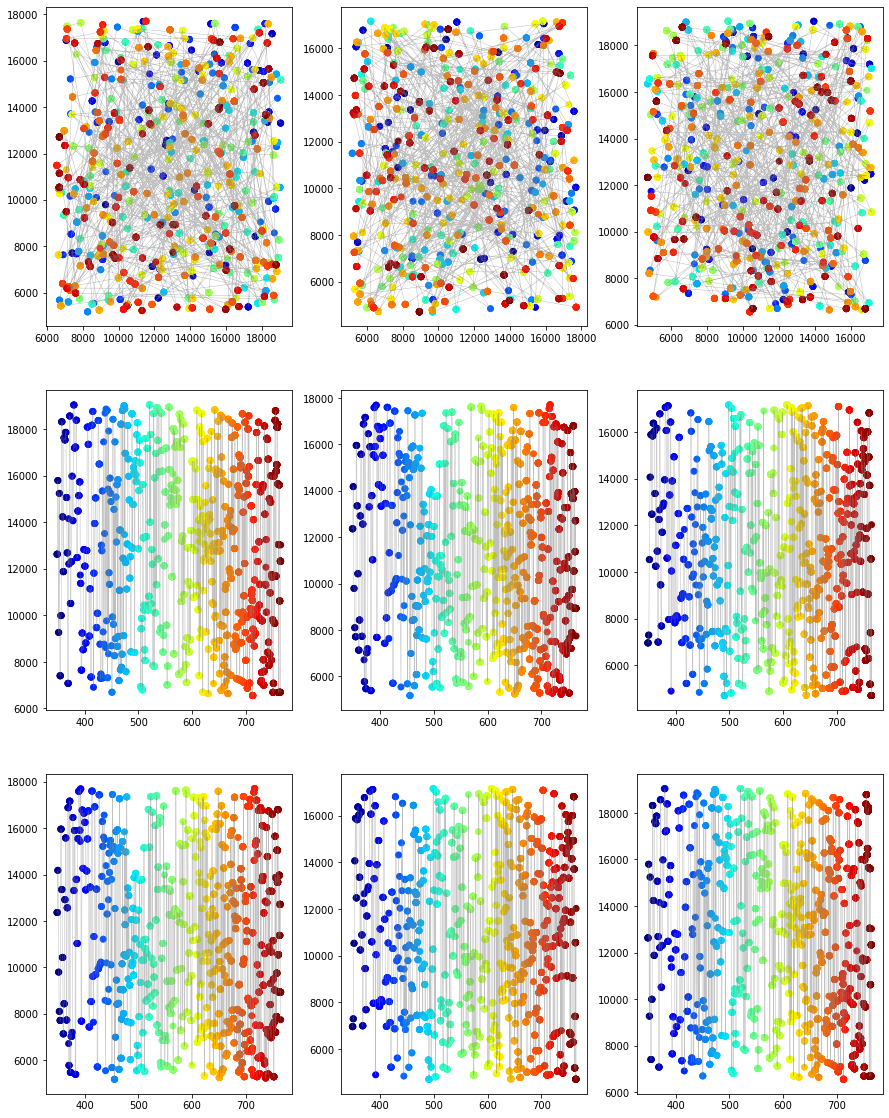

In [50]:
fig, axes = plt.subplots(figsize=[15, 20], nrows=3, ncols=3)
colors = zplot.smap(tage, scale='lin').to_rgba(tage)

for ii, axrow in enumerate(axes):
    for jj, ax in enumerate(axrow):
        aa = (jj+1) % 3
        bb = (jj+2) % 3    
        uu = pos[:, aa]
        vv = pos[:, bb]
        if ii == 0:
            ax.scatter(uu, vv, color=colors)
            ax.plot(uu, vv, c='0.5', alpha=0.5, lw=0.5)
        else:
            ww = [uu, vv][ii-1]
            ax.scatter(tage, ww, color=colors)
            ax.plot(tage, ww, c='0.5', alpha=0.5, lw=0.5)
            
# zplot.draw.plot_segmented_line(ax, pos[:, 0], pos[:, 1], zz=tage, colors='k')
# ax.scatter(pos[:, 0], pos[:, 1], color=colors)
# ax.plot(pos[:, 0], pos[:, 1], c='0.5', alpha=0.5, lw=0.5)

plt.show()


/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output


Loaded         98 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output/processed/bh-mergers.hdf5', created '2020-08-18 13:24:47.118793'
Loaded      22008 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output/processed/bh-details.hdf5', created '2020-08-18 13:24:55.758948'
BH: 1002488131 w/ 5038 details entries
tage: 541.84, 766.52
Saved to '/home/lkelley/programs/arepa/bh_new_centering_pos1002488131_000.pdf'
/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output


Loaded         50 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output/processed/bh-mergers.hdf5', created '2020-08-18 13:24:56.916363'
Loaded      12356 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition

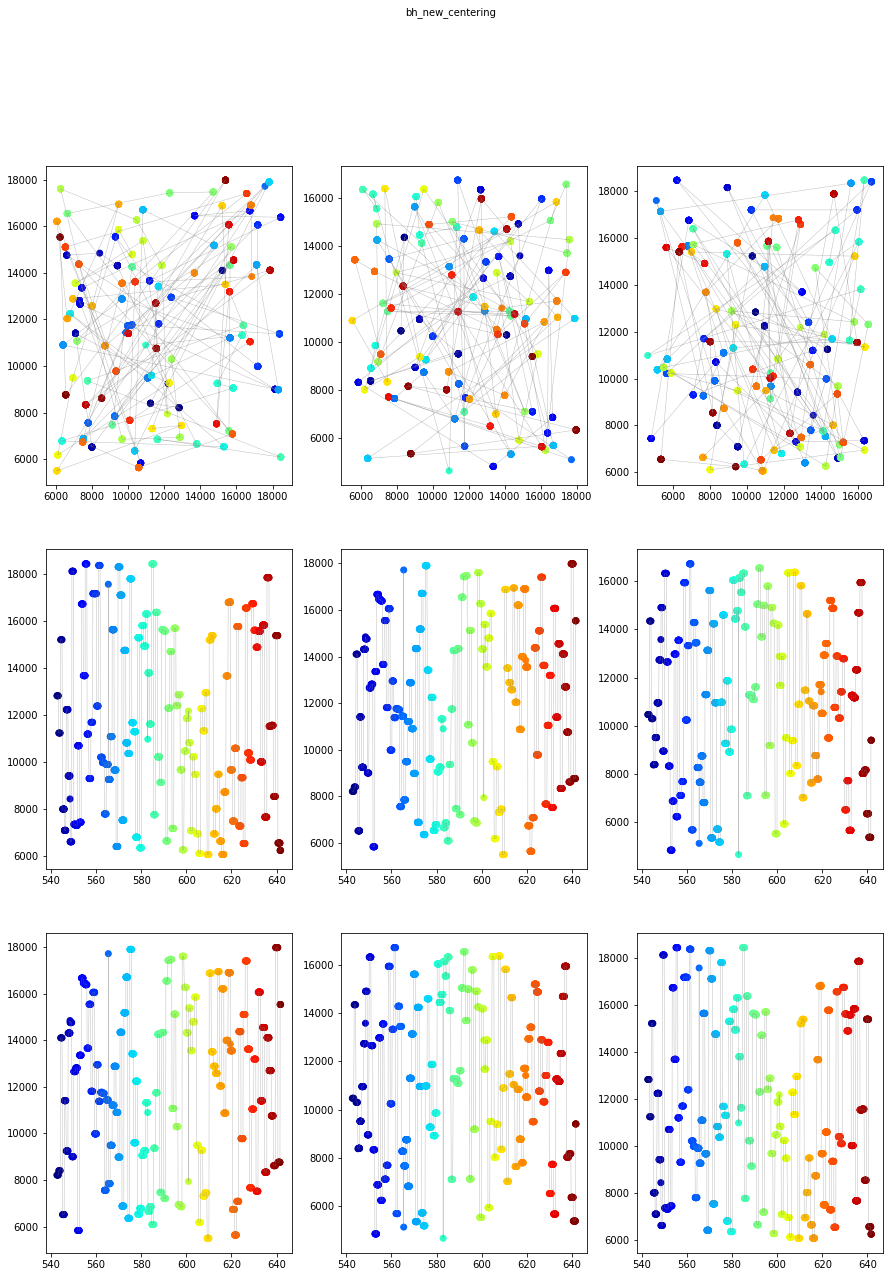

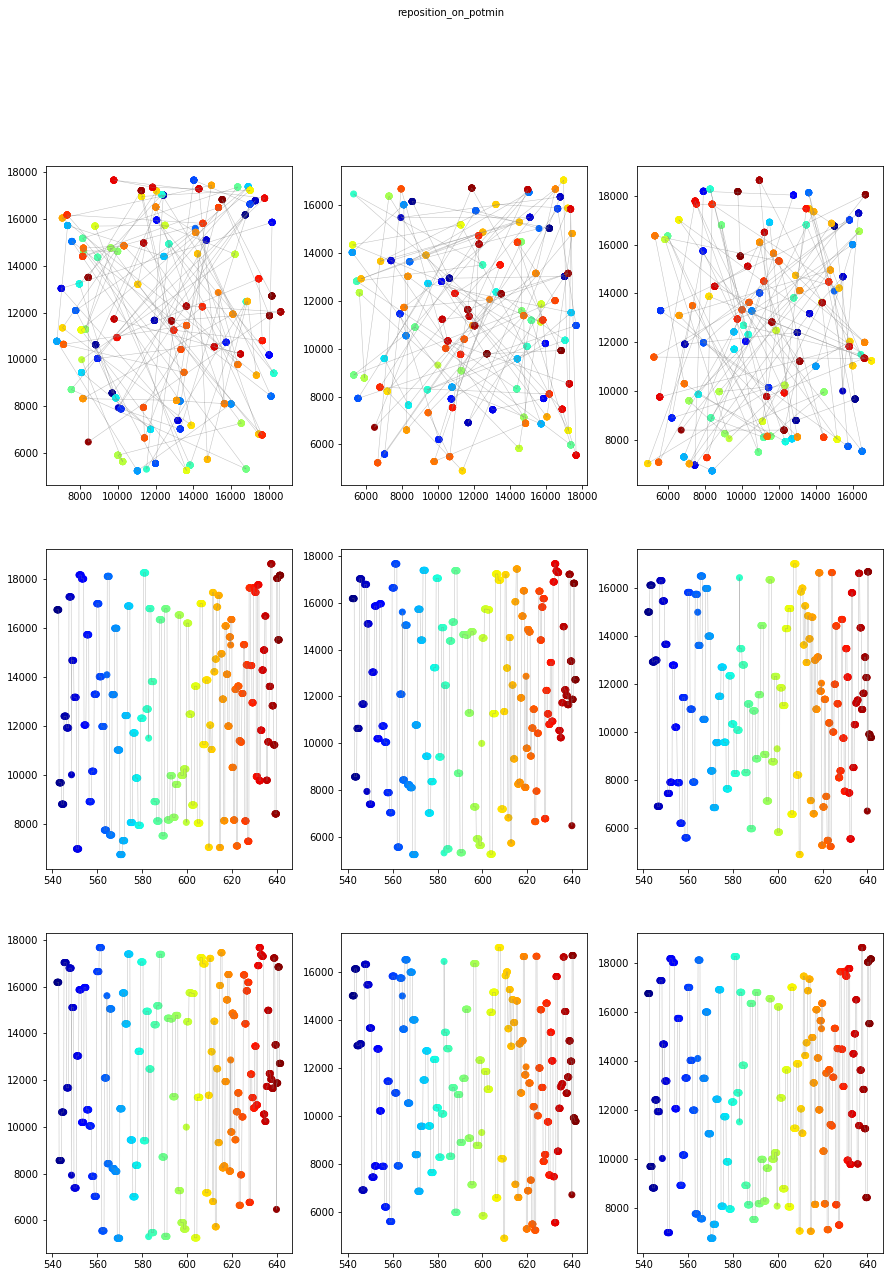

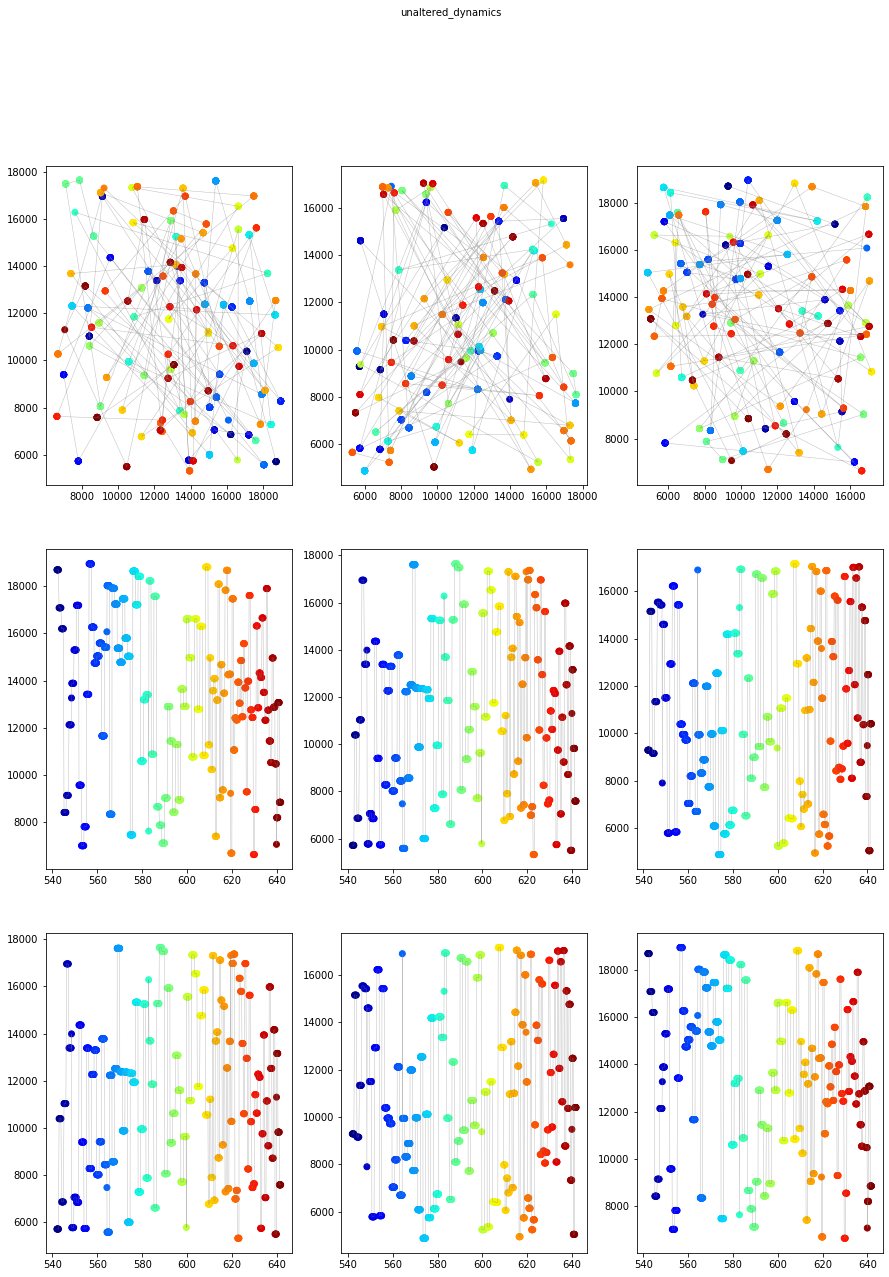

In [67]:
TMIN = None
TMAX = None
TDUR = 100.0

for sim in SIMS:
    
    sim_path = os.path.join(PATH, sim, 'output')
    print(f"{sim_path}\n\n")
    cosmo = illpy_lib.illcosmo.Simulation_Cosmology(sim_path, verbose=False)
    mergers = illpy_lib.illbh.mergers.Mergers_New(sim_path, recreate=False)
    details = illpy_lib.illbh.details.Details_New(sim_path, recreate=False)

    idx = np.argmax(details.unique_counts)
    bhid = details.unique_ids[idx]
    dnum = details.unique_counts[idx]
    beg = details.unique_indices[idx]
    print(f"BH: {bhid} w/ {dnum} details entries")

    ids = details.id[beg:beg+dnum]
    pos = details.pos[beg:beg+dnum, :]
    sca = details.scale[beg:beg+dnum]
    tage = cosmo.a_to_tage(sca) / MYR
    print("tage: {:.2f}, {:.2f}".format(*zmath.minmax(tage)))
        
    idx = True
    if TDUR is not None:
        if TMIN is not None:
            TMAX = TMIN + TDUR
        elif TMAX is not None:
            TMIN = TMAX - TDUR
        else:
            TMIN = tage.min()
            TMAX = TMIN + TDUR
        
    if TMIN is not None:
        idx = idx & (tage > TMIN)
    if TMAX is not None:
        idx = idx & (tage < TMAX)
    if idx is True:
        idx = slice(None)
    pos = pos[idx]
    sca = sca[idx]
    tage = tage[idx]
        
    fig, axes = plt.subplots(figsize=[15, 20], nrows=3, ncols=3)
    fig.text(0.5, 0.99, sim, ha='center', va='top')
    colors = zplot.smap(tage, scale='lin').to_rgba(tage)

    for ii, axrow in enumerate(axes):
        for jj, ax in enumerate(axrow):
            aa = (jj+1) % 3
            bb = (jj+2) % 3    
            uu = pos[:, aa]
            vv = pos[:, bb]
            if ii == 0:
                ax.scatter(uu, vv, color=colors)
                ax.plot(uu, vv, c='0.5', alpha=0.5, lw=0.5)
            else:
                ww = [uu, vv][ii-1]
                ax.scatter(tage, ww, color=colors)
                ax.plot(tage, ww, c='0.5', alpha=0.5, lw=0.5)

    fname = sim + f'_pos{bhid}.pdf'
    fname = os.path.abspath(fname)
    fname = zio.modify_exists(fname)
    fig.savefig(fname)
    print(f"Saved to '{fname}'")
    
plt.show()


/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output


Loaded      22008 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/bh_new_centering/output/processed/bh-details.hdf5', created '2020-08-18 13:24:55.758948'
BH: 1002488131 w/ 5038 details entries
Saved to '/home/lkelley/programs/arepa/bh_new_centering_mass1002488131.pdf'
/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output


Loaded      12356 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/reposition_on_potmin/output/processed/bh-details.hdf5', created '2020-08-18 13:25:02.513635'
BH: 1002482327 w/ 3105 details entries
Saved to '/home/lkelley/programs/arepa/reposition_on_potmin_mass1002482327.pdf'
/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/unaltered_dynamics/output


Loaded      18880 entries from '/blue/lblecha/lkelley/arepo_sims/cosmo_zooms//dynamics_comparison/unaltere

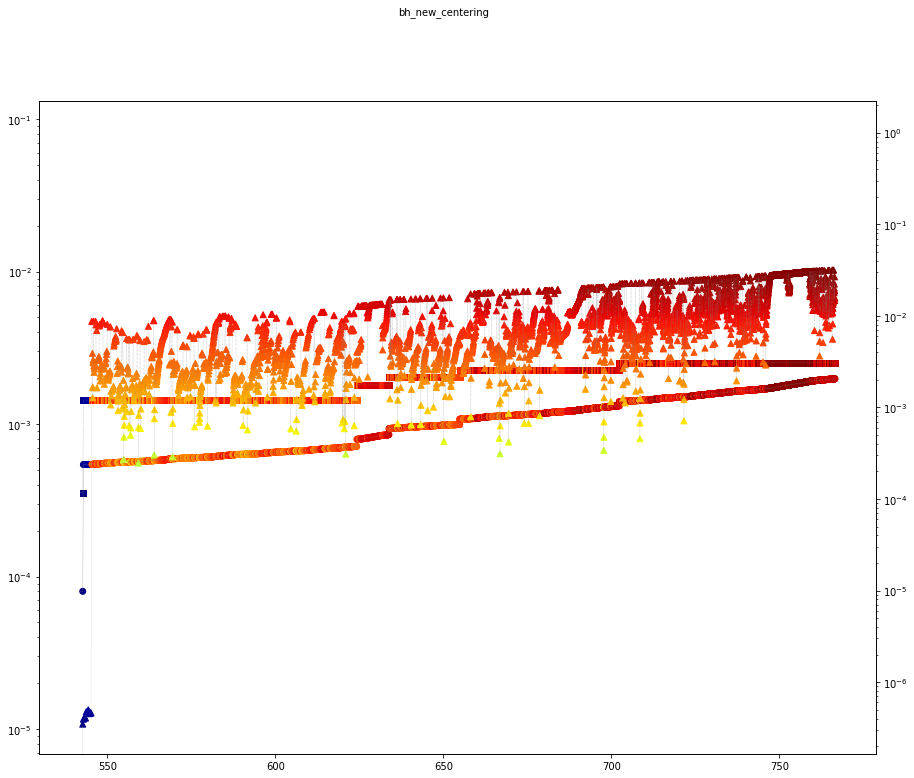

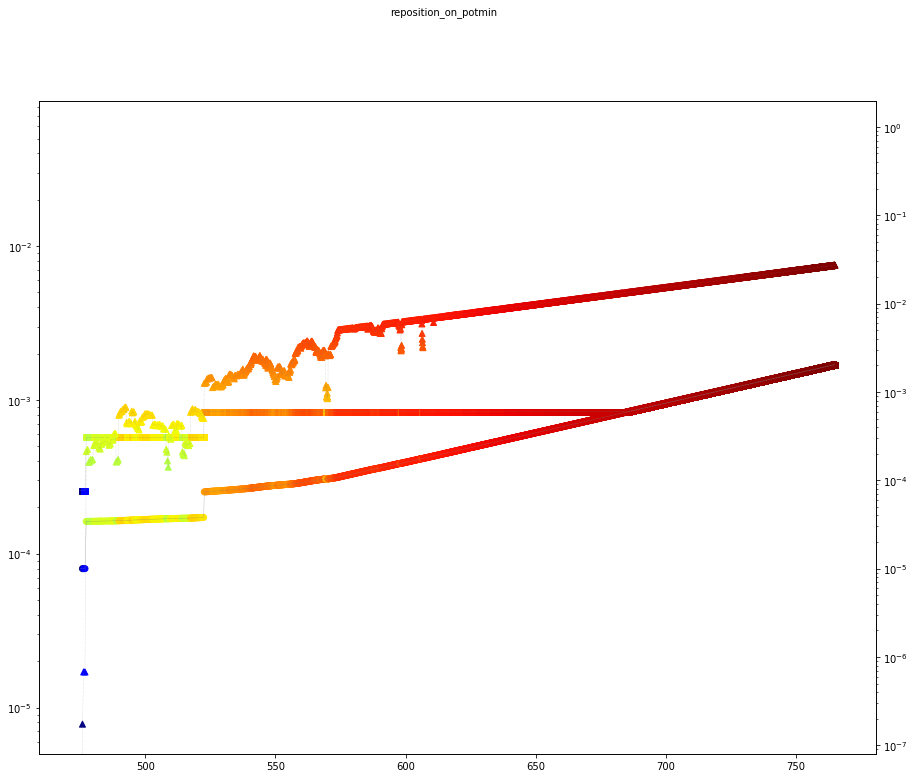

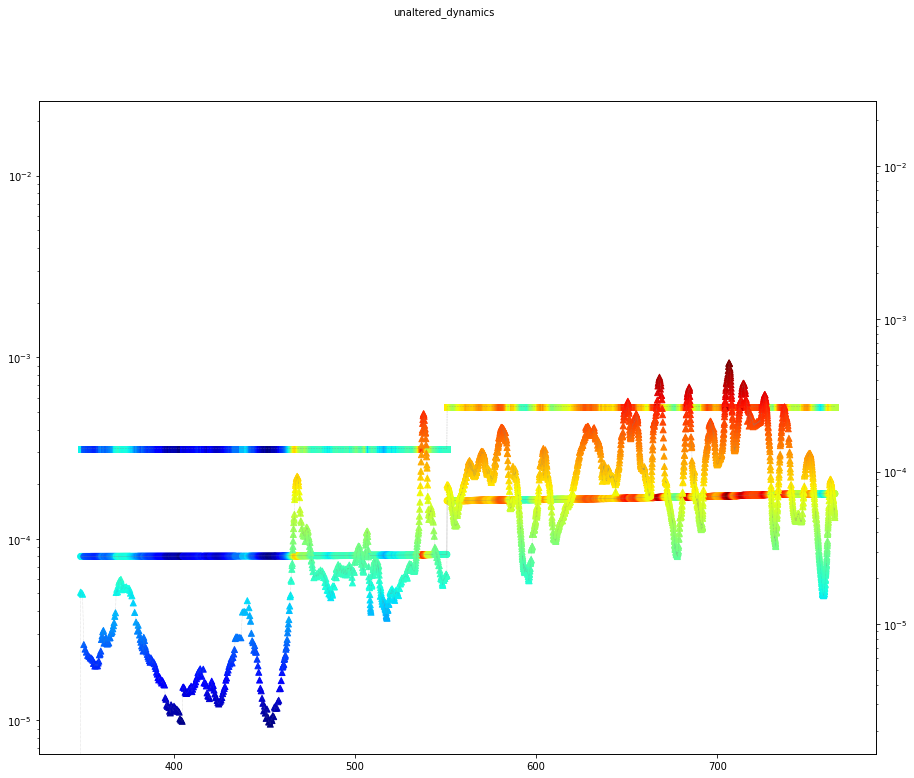

In [64]:
for sim in SIMS:
    sim_path = os.path.join(PATH, sim, 'output')
    print(f"{sim_path}\n\n")
    cosmo = illpy_lib.illcosmo.Simulation_Cosmology(sim_path, verbose=False)
    # mergers = illpy_lib.illbh.mergers.Mergers_New(sim_path, recreate=False)
    details = illpy_lib.illbh.details.Details_New(sim_path, recreate=False)

    idx = np.argmax(details.unique_counts)
    bhid = details.unique_ids[idx]
    dnum = details.unique_counts[idx]
    beg = details.unique_indices[idx]
    print(f"BH: {bhid} w/ {dnum} details entries")

    ids = details.id[beg:beg+dnum]
    if not np.all(ids == ids[0]):
        raise RuntimeError()
        
    # pos = details.pos[beg:beg+dnum, :]
    mass = details.mass[beg:beg+dnum]
    bh_mass = details.bh_mass[beg:beg+dnum]
    mdot = details.mdot[beg:beg+dnum]

    sca = details.scale[beg:beg+dnum]
    tage = cosmo.a_to_tage(sca) / MYR

    fig, ax = plt.subplots(figsize=[15, 12])
    ax.set_yscale('log')
    fig.text(0.5, 0.99, sim, ha='center', va='top')
#     colors = zplot.smap(tage, scale='lin').to_rgba(tage)
    colors = zplot.smap(mdot[mdot > 0], scale='log').to_rgba(mdot)    
    
    ax.scatter(tage, mass, color=colors, marker='s')
    ax.plot(tage, mass, color='0.5', lw=0.5, alpha=0.5, ls='--')

    ax.scatter(tage, bh_mass, color=colors, marker='o')
    ax.plot(tage, bh_mass, color='0.5', lw=0.5, alpha=0.5, ls='-')

    tw = ax.twinx()
    tw.set_yscale('log')
    tw.scatter(tage, mdot, color=colors, marker='^')
    tw.plot(tage, mdot, color='0.5', lw=0.5, alpha=0.5, ls=':')
    
    fname = sim + f'_mass{bhid}.pdf'
    fname = os.path.abspath(fname)
    fig.savefig(fname)
    print(f"Saved to '{fname}'")
    
plt.show()
